## Importing Weather Data

In [2]:
# Import 3rd party libraries, os (directory services), pandas (data manipulation), seaborn and matplotlib (for visualization)
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

In [26]:
import pandas as pd 

YTZ_files_list = [
    'src/Weather Data/jan_en_climate_hourly_ON_6158355_01-2022_P1H.csv',
    'src/Weather Data/feb_en_climate_hourly_ON_6158355_02-2022_P1H.csv',
    'src/Weather Data/march_en_climate_hourly_ON_6158355_03-2022_P1H.csv',
    'src/Weather Data/april_en_climate_hourly_ON_6158355_04-2022_P1H.csv'
]

#original source: Environment Canada 
#https://climate.weather.gc.ca/climate_data/hourly_data_e.html?hlyRange=2002-06-04%7C2022-04-04&dlyRange=2002-06-04%7C2022-04-04&mlyRange=2003-07-01%7C2006-12-01&StationID=31688&Prov=ON&urlExtension=_e.html&searchType=stnProx&optLimit=specDate&Month=4&Day=4&StartYear=1840&EndYear=2022&Year=2022&selRowPerPage=25&Line=0&txtRadius=25&optProxType=navLink&txtLatDecDeg=43.676666666667&txtLongDecDeg=-79.630555555556&timeframe=1

dataframes = []

for file in YTZ_files_list:
    temp = pd.read_csv(file)
    dataframes.append(temp)

YTZ_weather=pd.concat(dataframes)
YTZ_weather.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time (LST),Year,Month,Day,Time (LST),Temp (°C),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,-79.4,43.67,TORONTO CITY,6158355,2022-01-01 00:00,2022,1,1,00:00,4.6,...,NaN,NaN,NaN,99.37,NaN,NaN,NaN,NaN,NaN,NaN
1,-79.4,43.67,TORONTO CITY,6158355,2022-01-01 01:00,2022,1,1,01:00,4.7,...,NaN,NaN,NaN,99.29,NaN,NaN,NaN,NaN,NaN,NaN
2,-79.4,43.67,TORONTO CITY,6158355,2022-01-01 02:00,2022,1,1,02:00,4.7,...,NaN,NaN,NaN,99.17,NaN,NaN,NaN,NaN,NaN,NaN
3,-79.4,43.67,TORONTO CITY,6158355,2022-01-01 03:00,2022,1,1,03:00,4.8,...,NaN,NaN,NaN,99.16,NaN,NaN,NaN,NaN,NaN,NaN
4,-79.4,43.67,TORONTO CITY,6158355,2022-01-01 04:00,2022,1,1,04:00,4.8,...,NaN,NaN,NaN,99.16,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# Localize to time-stamp 
YTZ_weather['datetime_EST'] = pd.to_datetime(YTZ_weather['Date/Time (LST)'])
YTZ_weather = YTZ_weather.set_index(['datetime_EST'])
YTZ_weather.index = (YTZ_weather.index).tz_localize('EST')
YTZ_weather.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time (LST),Year,Month,Day,Time (LST),Temp (°C),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
datetime_EST,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00-05:00,-79.4,43.67,TORONTO CITY,6158355,2022-01-01 00:00,2022,1,1,00:00,4.6,...,NaN,NaN,NaN,99.37,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01 01:00:00-05:00,-79.4,43.67,TORONTO CITY,6158355,2022-01-01 01:00,2022,1,1,01:00,4.7,...,NaN,NaN,NaN,99.29,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01 02:00:00-05:00,-79.4,43.67,TORONTO CITY,6158355,2022-01-01 02:00,2022,1,1,02:00,4.7,...,NaN,NaN,NaN,99.17,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01 03:00:00-05:00,-79.4,43.67,TORONTO CITY,6158355,2022-01-01 03:00,2022,1,1,03:00,4.8,...,NaN,NaN,NaN,99.16,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01 04:00:00-05:00,-79.4,43.67,TORONTO CITY,6158355,2022-01-01 04:00,2022,1,1,04:00,4.8,...,NaN,NaN,NaN,99.16,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
#saving the combined dataframe 
YTZ_weather.to_csv('src/Weather Data/YTZ_weather.csv')

#to work with the compiled data-frame for all 4 months
YTZ_weather = pd.read_csv('src/Weather Data/YTZ_weather.csv')

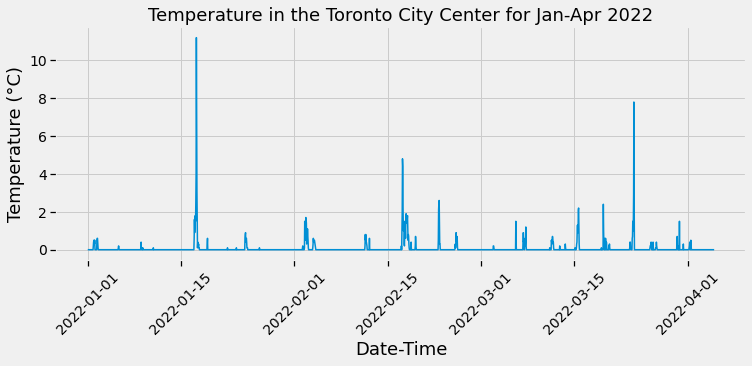

In [33]:
#Amount of snowfall over 4-month period
plt.figure(figsize=(11, 4))
plt.title('Temperature in the Toronto City Center for Jan-Apr 2022', fontsize=18)
ax = sns.lineplot(data=YTZ_weather, x='datetime_EST', y='Precip. Amount (mm)')

ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xlabel('Date-Time', fontsize=18)
ax.set_ylabel('Temperature (°C)', fontsize=18)
plt.xticks(rotation = 45)
plt.show()

<AxesSubplot:xlabel='Temp (°C)', ylabel='Density'>

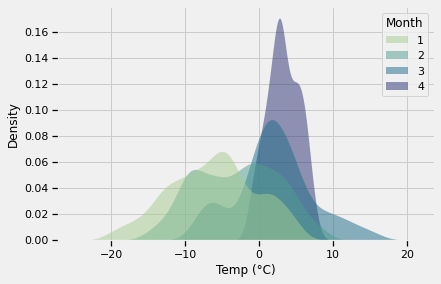

In [30]:
#visualize temperature distribution over 4 months
sns.kdeplot(
   data=YTZ_weather, x="Temp (°C)", hue="Month",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)